Importamos las librerías necesarias para nuestro análisis:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#pip install matplotlib_venn
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from wordcloud import WordCloud

In [6]:
viviendas = pd.read_csv('../data/viviendas.csv')

In [7]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   descripcion         100000 non-null  object 
 1   aire_acondicionado  100000 non-null  bool   
 2   balcon              100000 non-null  bool   
 3   num_banios          100000 non-null  int64  
 4   armario_empotrado   100000 non-null  bool   
 5   chimenea            100000 non-null  bool   
 6   condicion           100000 non-null  object 
 7   jardin              100000 non-null  bool   
 8   tipo_vivienda       100000 non-null  object 
 9   ascensor            100000 non-null  bool   
 10  ciudad              100000 non-null  object 
 11  calle_num           100000 non-null  object 
 12  direccion_com       100000 non-null  object 
 13  zona_y_provincia    100000 non-null  object 
 14  m2_reales           100000 non-null  int64  
 15  m2_utiles           100000 non-null

Después de nuestra limpieza nos hemos quedado con 21 variables en total para nuestro análisis. Tenemos 10 columnas de tipo booleano, 1 de tipo float, 4 de tipo integer y 7 de tipo object (que contienen strings). Vamos a analizar nuestras variables por el tipo de dato que contienen.

### VARIABLES BOOLEANAS

Tenemos 10 variables de tipo booleano: aire_acondicionado, balcon, armario_empotrado, chimenea, jardin, ascensor, movilidad_reducida, trastero, piscina y terraza. En todas las categorías, True significará que la vivienda contiene ese elemento y False que no lo contiene.

Empezamos por comprobar la proporción de True y False para todas las variables. Haremos esto mediante un pie chart:

In [8]:
booleanos = viviendas[['aire_acondicionado','balcon','armario_empotrado','chimenea','jardin','ascensor','movilidad_reducida','trastero','piscina','terraza']]

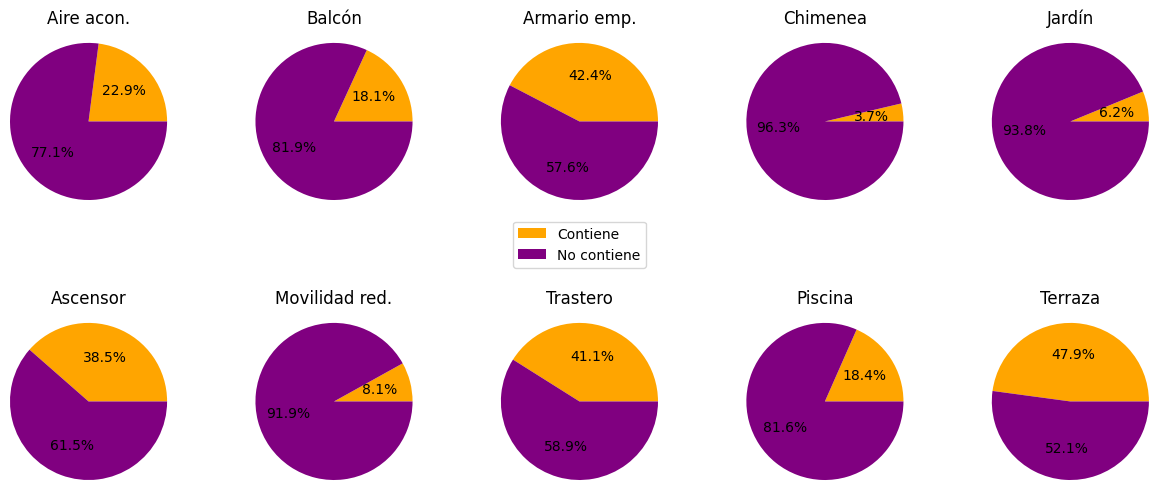

In [9]:
etiquetas = ['Contiene','No contiene']

pie_todos = plt.figure(figsize=(12,8))

plt.subplot(2,5,1)
plt.pie([(viviendas['aire_acondicionado'].value_counts()).get(True,0), (viviendas['aire_acondicionado'].value_counts()).get(False,0)],
        radius=2,
        autopct='%1.1f%%',
        colors=('orange','purple'))
plt.title('Aire acon.', pad=35)

plt.subplot(2,5,2)
plt.pie([(viviendas['balcon'].value_counts()).get(True,0), (viviendas['balcon'].value_counts()).get(False,0)],
        radius=2,
        autopct='%1.1f%%',
        colors=('orange','purple'))
plt.title('Balcón', pad=35)

plt.subplot(2,5,3)
plt.pie([(viviendas['armario_empotrado'].value_counts()).get(True,0), (viviendas['armario_empotrado'].value_counts()).get(False,0)],
        radius=2,
        autopct='%1.1f%%',
        colors=('orange','purple'))
plt.title('Armario emp.', pad=35)

plt.subplot(2,5,4)
plt.pie([(viviendas['chimenea'].value_counts()).get(True,0), (viviendas['chimenea'].value_counts()).get(False,0)],
        radius=2,
        autopct='%1.1f%%',
        colors=('orange','purple'))
plt.title('Chimenea', pad=35)

plt.subplot(2,5,5)
plt.pie([(viviendas['jardin'].value_counts()).get(True,0), (viviendas['jardin'].value_counts()).get(False,0)],
        radius=2,
        autopct='%1.1f%%',
        colors=('orange','purple'))
plt.title('Jardín', pad=35)

plt.subplot(2,5,6)
plt.pie([(viviendas['ascensor'].value_counts()).get(True,0), (viviendas['ascensor'].value_counts()).get(False,0)],
        radius=2,
        autopct='%1.1f%%',
        colors=('orange','purple'))
plt.title('Ascensor', pad=35)

plt.subplot(2,5,7)
plt.pie([(viviendas['movilidad_reducida'].value_counts()).get(True,0), (viviendas['movilidad_reducida'].value_counts()).get(False,0)],
        radius=2,
        autopct='%1.1f%%',
        colors=('orange','purple'))
plt.title('Movilidad red.', pad=35)

plt.subplot(2,5,8)
plt.pie([(viviendas['trastero'].value_counts()).get(True,0), (viviendas['trastero'].value_counts()).get(False,0)],
        radius=2,
        autopct='%1.1f%%',
        colors=('orange','purple'))
plt.title('Trastero', pad=35)

plt.subplot(2,5,9)
plt.pie([(viviendas['piscina'].value_counts()).get(True,0), (viviendas['piscina'].value_counts()).get(False,0)],
        radius=2,
        autopct='%1.1f%%',
        colors=('orange','purple'))
plt.title('Piscina', pad=35)

plt.subplot(2,5,10)
plt.pie([(viviendas['terraza'].value_counts()).get(True,0), (viviendas['terraza'].value_counts()).get(False,0)],
        radius=2,
        autopct='%1.1f%%',
        colors=('orange','purple'))
plt.title('Terraza',pad=35)

plt.subplots_adjust(left=0.05,right=0.95,top=0.9,bottom=0.2,wspace=1.5,hspace=0)
pie_todos.legend(etiquetas,loc='center');

Como podemos comprobar, en todos los casos los pisos en venta tienden a no contener la característica en cuestión en lugar de sí contenerla. El mayor porcentaje lo encontramos en el caso de la terraza, donde el 47,9% de los pisos en venta tienen esta característica. En el otro lado de la balanza, solo el 3,7% de los pisos en venta cuenta con chimenea.

Vamos a analizar las variables en cuanto a la accesibilidad. Veamos qué información obtenemos sobre las variables que nos hablan de certificación de movilidad reducida y tener ascensor.

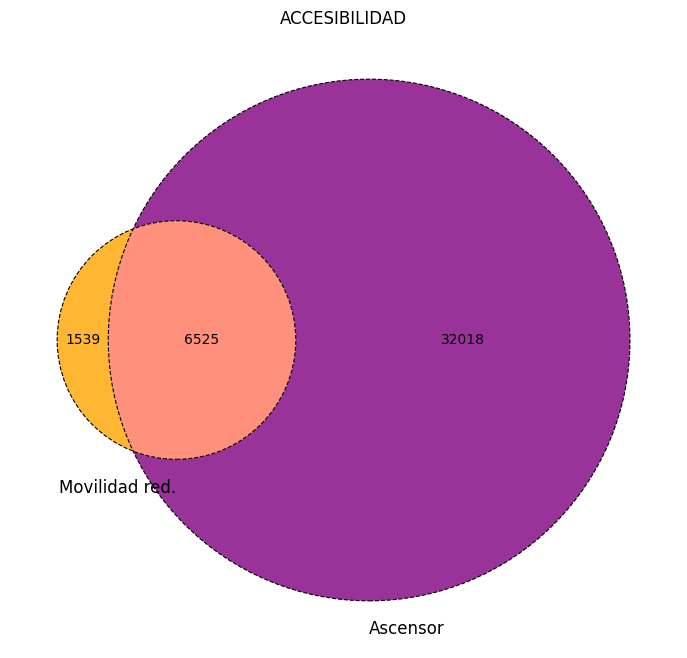

In [10]:
mov_red = set(viviendas['movilidad_reducida'][viviendas['movilidad_reducida'] == True].index)
asc = set(viviendas['ascensor'][viviendas['ascensor'] == True].index)

plt.figure(figsize=(12,8))
venn2(subsets=[mov_red, asc],set_labels=('Movilidad red.','Ascensor'), set_colors=('orange','purple'),alpha=0.8)
venn2_circles(subsets=[mov_red, asc], linestyle='dashed', linewidth=0.8)
plt.title('ACCESIBILIDAD')

plt.show()

Ahora analicemos las variables en cuanto a lo que consideraríamos una vivienda con todas las comodidades, es decir, que contenga piscina, terraza y aire acondicionado:

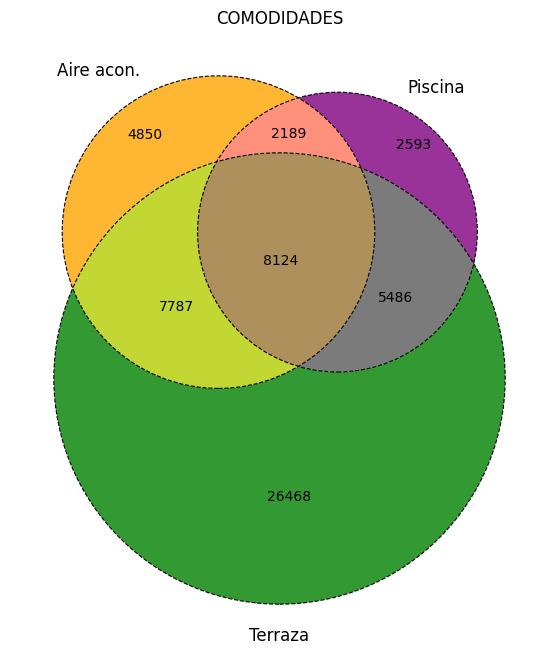

In [11]:
pis = set(viviendas['piscina'][viviendas['piscina'] == True].index)
ter = set(viviendas['terraza'][viviendas['terraza'] == True].index)
air = set(viviendas['aire_acondicionado'][viviendas['aire_acondicionado'] == True].index)

plt.figure(figsize=(8,8))
venn3(subsets=[air,pis,ter],set_labels=('Aire acon.','Piscina','Terraza'), set_colors=('orange','purple','green'),alpha=0.8)
venn3_circles(subsets=[air,pis,ter], linestyle='dashed', linewidth=0.8)
plt.title('COMODIDADES')

plt.show()

* Solo tiene terraza y aire acondicionado: 7787 viviendas
* Solo tiene terraza y piscina: 5486 viviendas
* Solo tiene aire acondicionado y piscina: 2189 viviendas
* Tiene terraza, aire acondicionado y piscina a la vez: 8124 viviendas

Ahora vamos a analizar las posibles correlaciones entre nuestras variables booleanas. De este modo, veremos si el hecho de contener una de las variables hace que sea más probable que contenga o no otra.

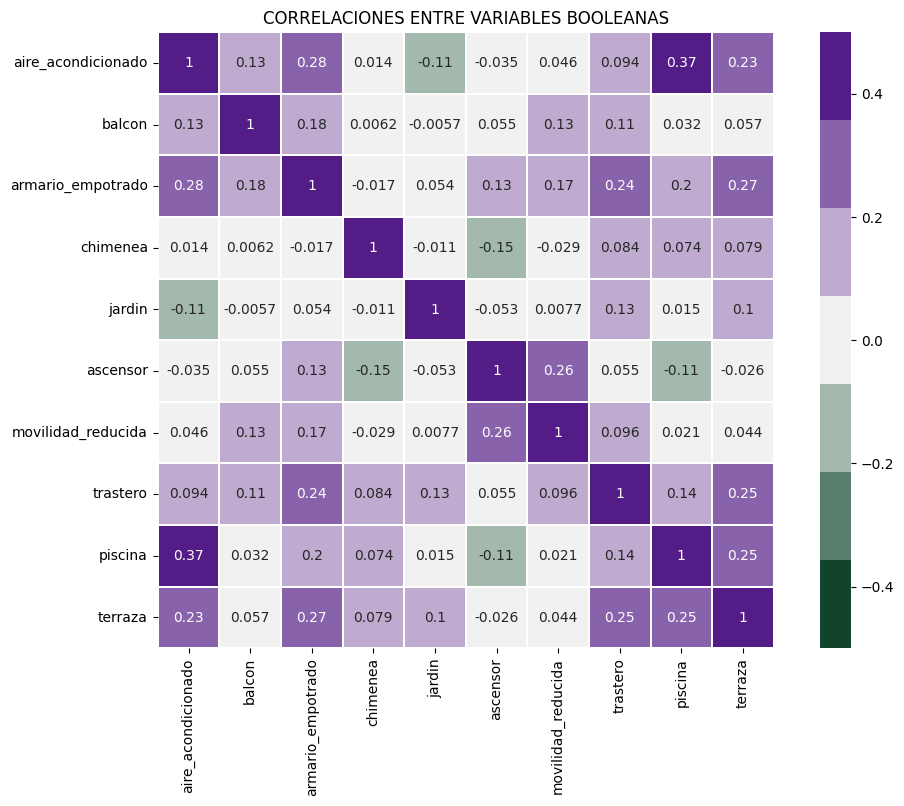

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(booleanos.corr(),
            vmin=-0.5,
            vmax=0.5,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True)
plt.title('CORRELACIONES ENTRE VARIABLES BOOLEANAS');

Vemos que la mayoría de variables no tienen una gran correlación entre ellas. Incluso hemos tenido que limitar la divergencia de colores a [-0.5 , 0.5] para que la visualización fuera más representativa.

Las variables que menos correlación tienen son chimenea y aire acondicionado, mientras que las más correlacionadas son piscina y aire acondicionado. En el segundo caso vemos que el resultado tiene bastante sentido, ya que es muy probable que una vivienda que tiene piscina tenga también aire acondicionado.

### VARIABLES INTEGER

Empezaremos analizando las variables de número de habitaciones y número de baños.

In [13]:
viviendas['num_habitaciones'].agg(['max','min','mean','median'])

max       84.00000
min        0.00000
mean       3.19914
median     3.00000
Name: num_habitaciones, dtype: float64

Vemos que la cantidad media de habitaciones es de 3,2. Sin embargo, tenemos una vivienda con un máximo de 84 habitaciones que hace que la visualización de un boxplot de esta variable no sea representativa.

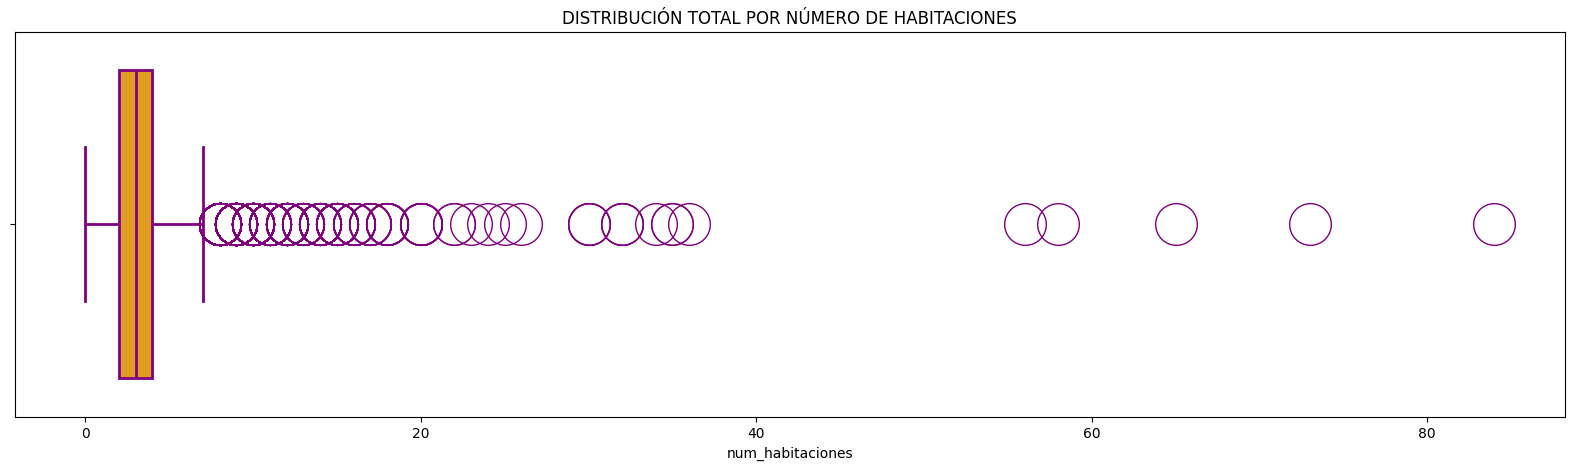

In [14]:
plt.figure(figsize=(20,5))
plt.title('DISTRIBUCIÓN TOTAL POR NÚMERO DE HABITACIONES')
sns.boxplot(x=viviendas["num_habitaciones"] , color="orange", fill=True, linecolor='purple', linewidth=2, fliersize=30);

Tendremos que adaptarla para conseguir una visualización útil.

Tenemos una variable cualitativa que representa el tipo de vivienda. Veamos qué información conseguimos si dividimos el número de habitaciones entre los diferentes tipos de vivienda. 

In [15]:
print(viviendas['tipo_vivienda'].unique())
print(viviendas['tipo_vivienda'].nunique())
#tenemos 32 tipos de vivienda diferentes

[' Casa o chalet independiente' 'Ático' ' Casa de pueblo' 'Piso'
 ' Casa rural' ' Chalet adosado' ' Casa o chalet' ' Caserón'
 ' Chalet pareado' 'Dúplex' 'Estudio' ' Finca rústica' ' Palacio' ' Torre'
 'Casa rural' 'Alquiler de Piso' 'Alquiler de Casa o chalet independiente'
 'Alquiler de Dúplex' 'Alquiler de Chalet adosado' 'Alquiler de Estudio'
 'Alquiler de Finca rústica' 'Alquiler de Casa o chalet'
 'Alquiler de Ático' 'Alquiler de Casa rural' 'Alquiler de Chalet pareado'
 ' Castillo' ' Masía' ' Cortijo' 'indefinido' ' Casa terrera'
 'Alquiler de Caserón' 'Alquiler de Casa de pueblo']
32


Vamos a analizar dos casos tan diferentes como estos: cuando una vivienda es de tipo piso y cuando es de tipo castillo

In [16]:
print(viviendas['num_habitaciones'][viviendas['tipo_vivienda'] == 'Piso'].agg(['max','min','mean','median','std']))
print(viviendas['num_habitaciones'][viviendas['tipo_vivienda'] == ' Castillo'].agg(['max','min','mean','median','std']))

max       56.000000
min        0.000000
mean       2.761989
median     3.000000
std        1.011516
Name: num_habitaciones, dtype: float64
max       34.00000
min        4.00000
mean      14.62500
median    12.50000
std        9.47082
Name: num_habitaciones, dtype: float64


En el caso de los pisos, la media de habitaciones está en 2,76, sin embargo, tenemos una vivienda con un máximo de 56 habitaciones, lo que sigue impidiendo hacer un análisis visual. Además, hay pisos sin habitaciones. Para nuestro análisis limitaremos estos valores.

Por otro lado, en el caso de los castillos, curiosamente el valor máximo de habitaciones es menor que en el caso de los pisos, pero tanto la media como la mediana son muy superiores.

In [17]:
piso = viviendas['num_habitaciones'][(viviendas['tipo_vivienda'] == 'Piso') & (viviendas['num_habitaciones'] < 30) & (viviendas['num_habitaciones'] > 0)]
casti = viviendas['num_habitaciones'][(viviendas['tipo_vivienda'] == ' Castillo')]

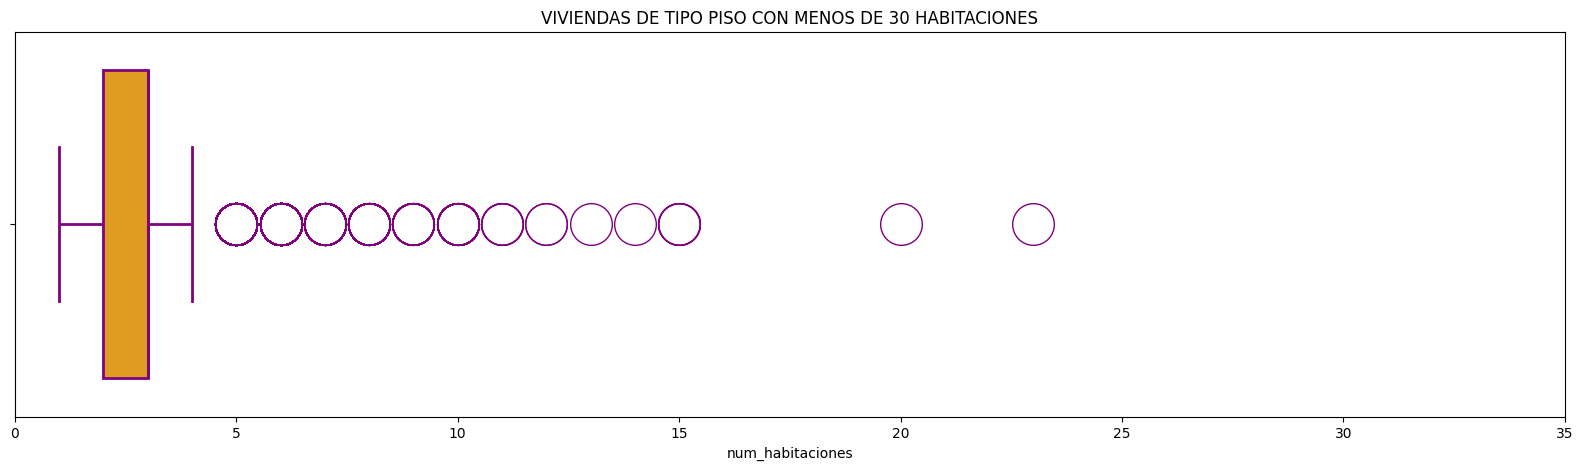

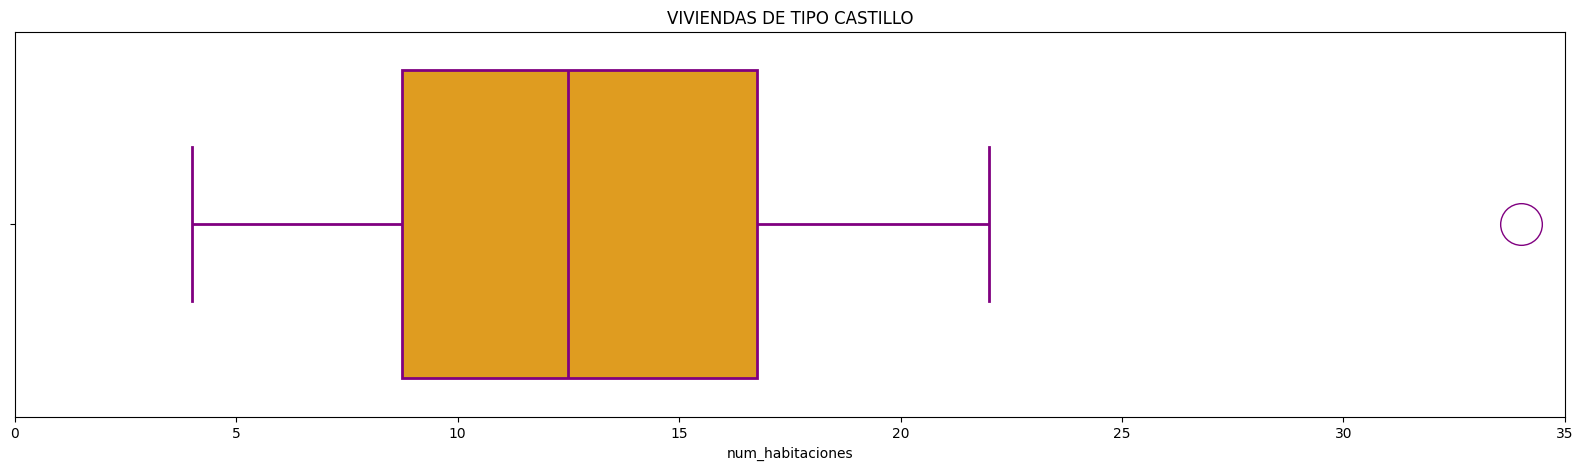

In [18]:
plt.figure(figsize=(20,5))
plt.title('VIVIENDAS DE TIPO PISO CON MENOS DE 30 HABITACIONES')
sns.boxplot(data=piso, color="orange", fill=True, linecolor='purple', linewidth=2, fliersize=30, orient='h')
plt.xlim(0,35)

plt.figure(figsize=(20,5))
plt.title('VIVIENDAS DE TIPO CASTILLO')
sns.boxplot(data=casti, color="orange", fill=True, linecolor='purple', linewidth=2, fliersize=30, orient='h')
plt.xlim(0,35);

Analicemos la variable de número de baños. Para las visualizaciones, limitaremos la cantidad de baños por vivienda a menos de 10:

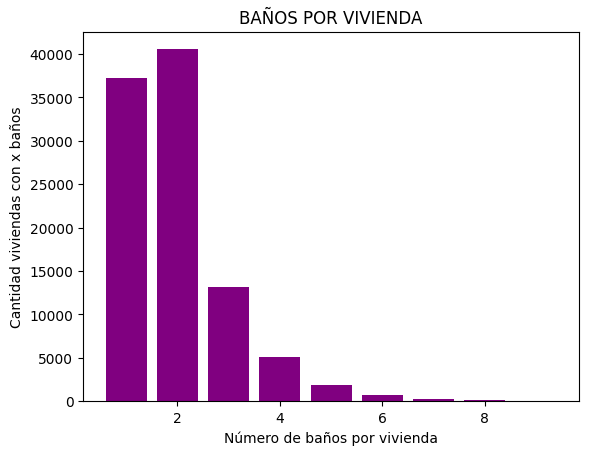

In [19]:
datos = viviendas['num_banios'][viviendas['num_banios']<10]

plt.hist(datos, bins=range(1, max(datos) + 2), rwidth=0.8, align='left', color='purple')
plt.xlabel('Número de baños por vivienda')
plt.ylabel('Cantidad viviendas con x baños')
plt.title('BAÑOS POR VIVIENDA')
plt.show()

Como vemos, la moda es 2 baños, es decir, el valor que más se repite en las viviendas a la venta es de 2

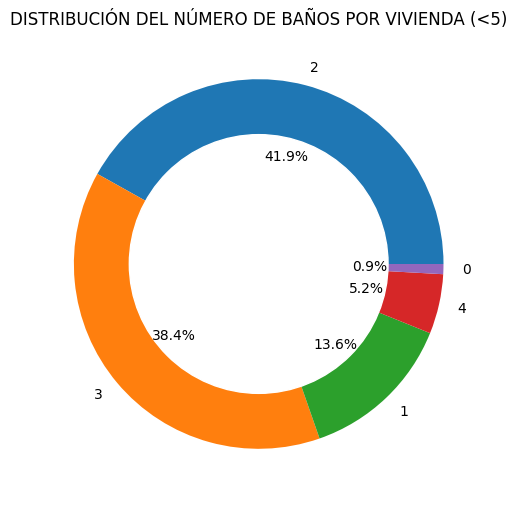

In [20]:
my_circle=plt.Circle((0,0), 0.7, color='white')

plt.figure(figsize=(10,6))
plt.pie(viviendas['num_banios'][viviendas['num_banios']<5].value_counts(),
        radius=1,
        autopct='%1.1f%%',
        labels=viviendas['num_banios'][viviendas['num_banios']<5].unique())
plt.title('DISTRIBUCIÓN DEL NÚMERO DE BAÑOS POR VIVIENDA (<5)')

p=plt.gcf()
p.gca().add_artist(my_circle);

En el caso del donut chart, hemos limitado la cantidad de baños a menor de 5 para que sea más fácil de analizar

Vamos a comprobar la posible correlación entre número de habitaciones y número de baños por vivienda:

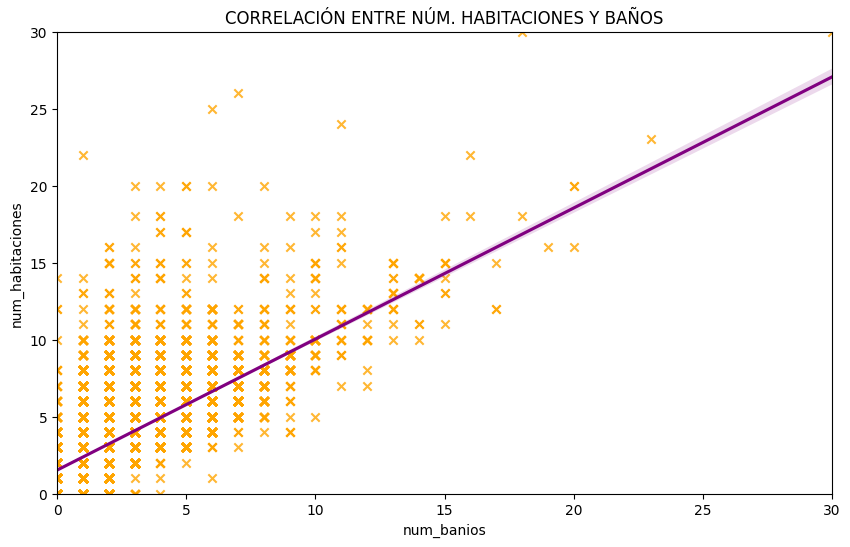

In [49]:
plt.figure(figsize=(10,6))
plt.xlim(0,30)
plt.ylim(0,30)

sns.regplot(x=viviendas['num_banios'],
            y=viviendas['num_habitaciones'], color='orange', marker='x', line_kws=dict(color='purple'))
plt.title('CORRELACIÓN ENTRE NÚM. HABITACIONES Y BAÑOS');

Vemos que hay una clara relación lineal entre las variables de número de habitaciones y número de baños, hasta el punto de ser una recta casi de 45 grados (y=x)

Ahora analicemos la variable de precio de la vivienda:

In [22]:
viviendas['precio'].agg(['max','min','mean','median'])

max       2.300000e+07
min       0.000000e+00
mean      3.786960e+05
median    2.100000e+05
Name: precio, dtype: float64

La media de precio se sitúa en 210.000€. Sin embargo, tenemos unos valores máximos muy altos, siendo el máximo absoluto 23.000.000€. Por ello una distribución gráfica de los precios no será demasiado representativa y tendremos que aplicar algunos filtros.

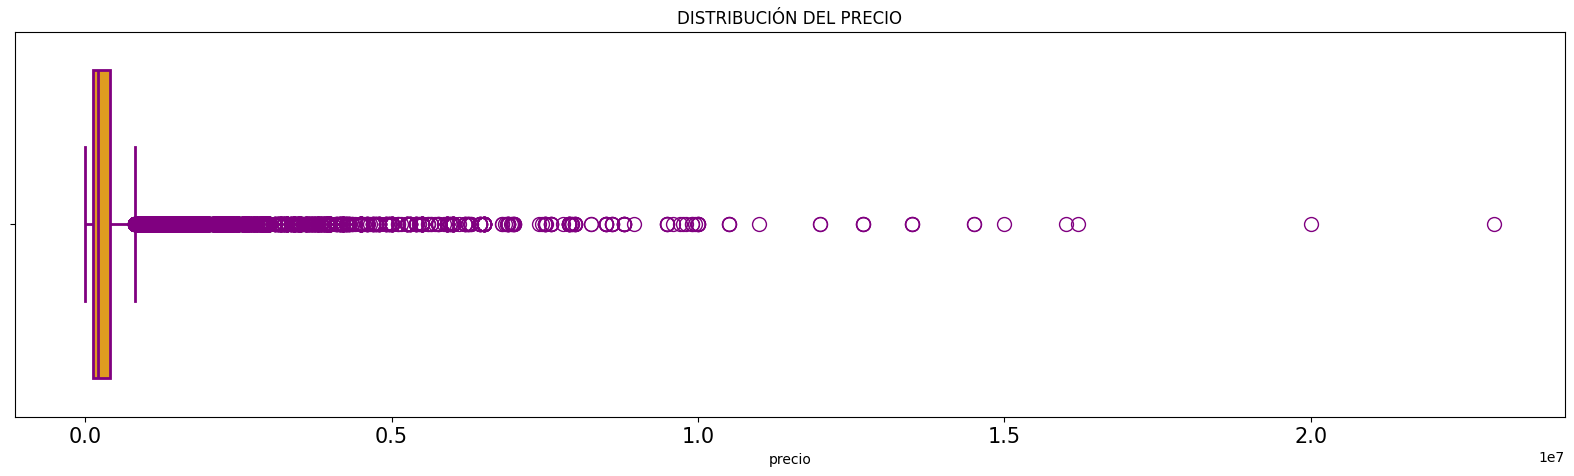

In [23]:
plt.figure(figsize=(20,5))
plt.title('DISTRIBUCIÓN DEL PRECIO')
sns.boxplot(data=viviendas['precio'], color="orange", fill=True, linecolor='purple', linewidth=2, fliersize=10, orient='h')
plt.xticks(fontsize=15);

Como podemos ver, la distribución está muy concentrada entorno a los valores alrededor de 200.000€. Sin embargo, también hay una multitud de valores que llegan hasta 23.000.000€

Analicemos ahora la distribución del precio acotando nuestro análisis. Vamos a volver a usar las viviendas de tipo piso y tipo castillo. Además, en el caso de los pisos, vamos a limitar el valor máximo a por debajo de 1 millón de euros:

In [24]:
mediana = viviendas['precio'][(viviendas['tipo_vivienda'] == 'Piso') & (viviendas['precio']<1000000)].median()
mediana

180000.0

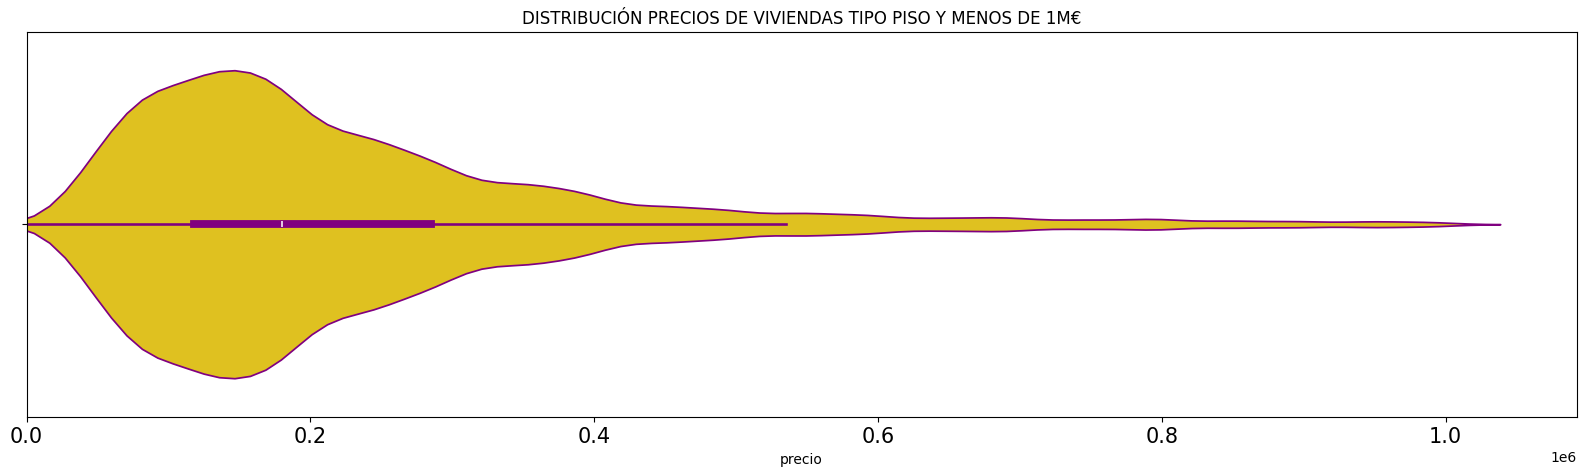

In [25]:
plt.figure(figsize=(20,5))
sns.violinplot(data = viviendas['precio'][(viviendas['tipo_vivienda'] == 'Piso') & (viviendas['precio']<1000000)], color='#FFD700', fill=True, orient='h', linecolor='purple')
plt.title('DISTRIBUCIÓN PRECIOS DE VIVIENDAS TIPO PISO Y MENOS DE 1M€')
plt.xticks(fontsize=15)
plt.xlim(0);

Como vemos, la mayoría de precios de pisos están concentrados en vaores por debajo de 200.000€

In [26]:
viviendas['precio'][viviendas['tipo_vivienda'] == ' Castillo'].agg(['max','min','mean','median'])

max       15000000.0
min         155000.0
mean       3538125.0
median     2375000.0
Name: precio, dtype: float64

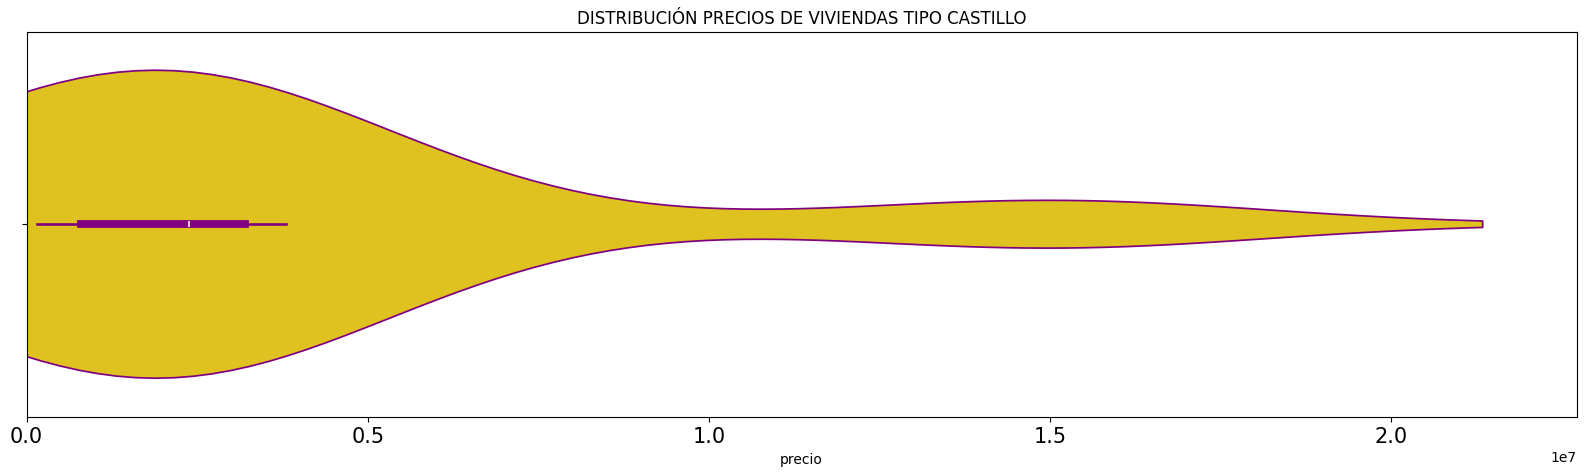

In [27]:
plt.figure(figsize=(20,5))
sns.violinplot(data = viviendas['precio'][(viviendas['tipo_vivienda'] == ' Castillo')], color='#FFD700', orient='h', linecolor='purple')
plt.title('DISTRIBUCIÓN PRECIOS DE VIVIENDAS TIPO CASTILLO')
plt.xlim(0)
plt.xticks(fontsize=15);

La mediana de valores de los precios para las viviendas de tipo castillo se encuentra en torno a los 2,3 millones.

Ahora analizaremos la diferencia en precio de una vivienda que consideraríamos rica, es decir, que contenga tanto aire acondicionado como chimenea, piscina, jardín y trastero, con respecto a una vivienda pobre, que no contenga ni una de las variables mencionadas:

In [28]:
# casa rica
casa_rica = viviendas['precio'][(viviendas['aire_acondicionado'] == True) 
                                 & (viviendas['chimenea'] == True)
                                 & (viviendas['piscina'] == True)
                                 & (viviendas['jardin'] == True)
                                 & (viviendas['trastero'] == True)
                                 ]

In [29]:
casa_rica.agg(['max','min','mean','median'])

max       2.500000e+06
min       4.500000e+05
mean      1.071667e+06
median    8.500000e+05
Name: precio, dtype: float64

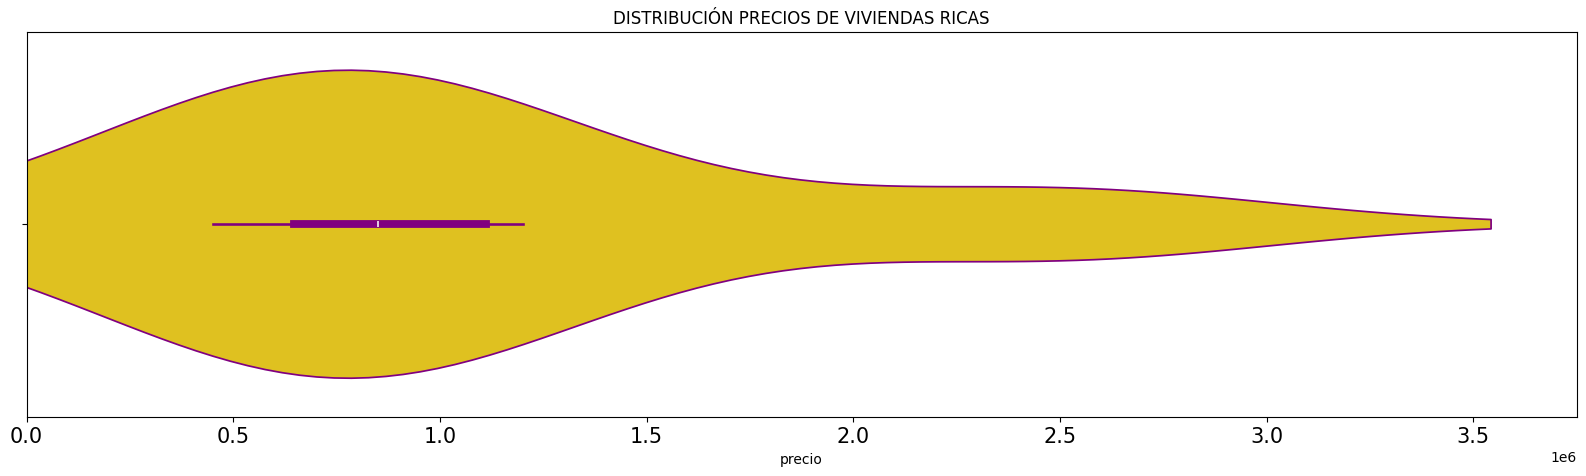

In [30]:
plt.figure(figsize=(20,5))
sns.violinplot(data = casa_rica, color='#FFD700', fill=True, orient='h', linecolor='purple')
plt.title('DISTRIBUCIÓN PRECIOS DE VIVIENDAS RICAS')
plt.xticks(fontsize=15)
plt.xlim(0);

La mediana de viviendas que contienen todas las características se encuentra en 850.000€

In [31]:
# casa pobre
casa_pobre = viviendas['precio'][(viviendas['aire_acondicionado'] == False) 
                                 & (viviendas['chimenea'] == False)
                                 & (viviendas['piscina'] == False)
                                 & (viviendas['jardin'] == False)
                                 & (viviendas['trastero'] == False)
                                 & (viviendas['precio']<300000)]

In [32]:
casa_pobre.agg(['max','min','mean','median'])

max       299999.000000
min            0.000000
mean      130905.756801
median    126000.000000
Name: precio, dtype: float64

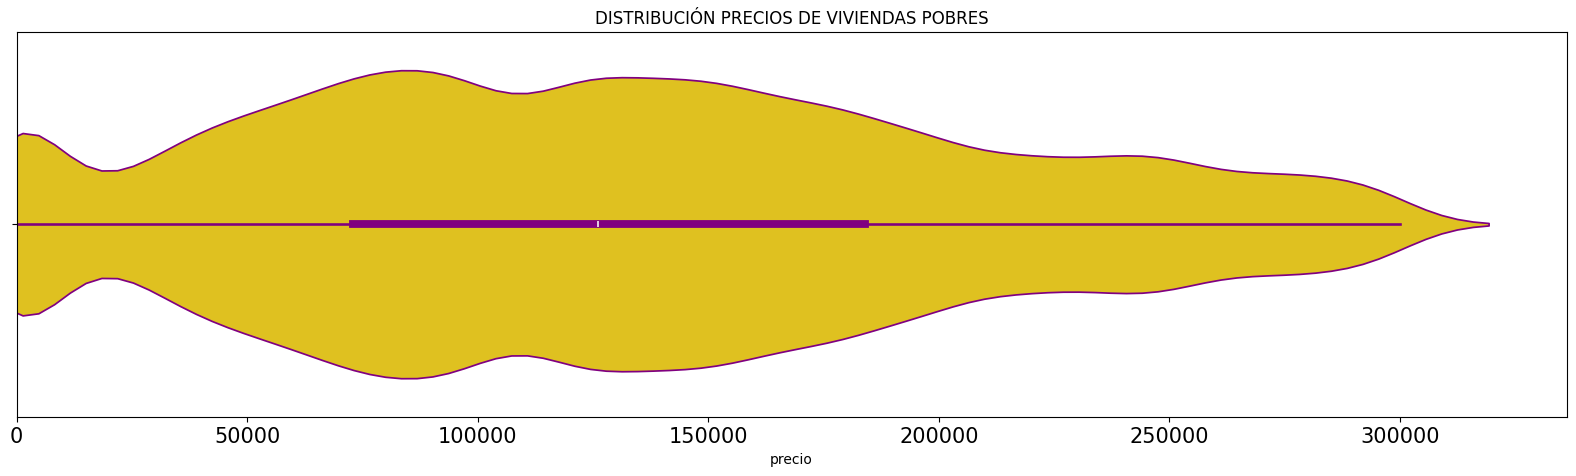

In [33]:
plt.figure(figsize=(20,5))
sns.violinplot(casa_pobre, color='#FFD700', fill=True, orient='h', linecolor='purple')
plt.title('DISTRIBUCIÓN PRECIOS DE VIVIENDAS POBRES')
plt.xticks(fontsize=15)
plt.xlim(0);

Mientras que la mediana de precio en las viviendas consideradas pobres se encuentra alrededor de 130.000€

Ahora analizaremos la variable de los metros cuadrados reales de las viviendas:

In [34]:
viviendas['m2_reales'].agg(['max','min','mean','median'])

max       900000.00000
min            0.00000
mean        1698.80238
median       111.00000
Name: m2_reales, dtype: float64

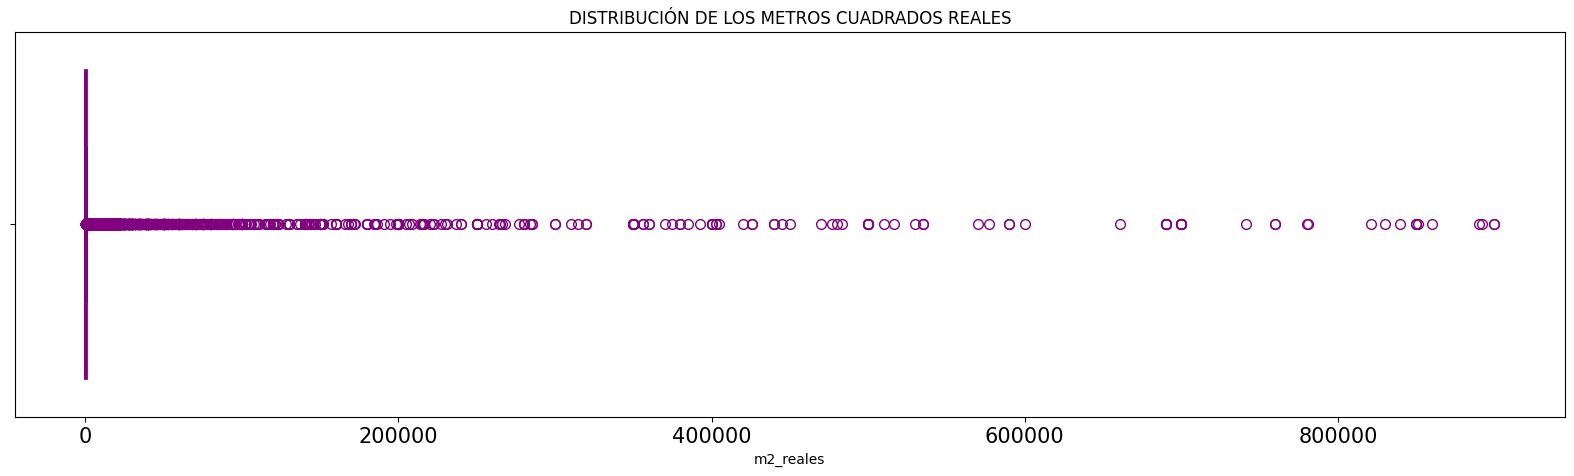

In [35]:
plt.figure(figsize=(20,5))
plt.title('DISTRIBUCIÓN DE LOS METROS CUADRADOS REALES')
sns.boxplot(data=viviendas['m2_reales'], color="orange", fill=True, linecolor='purple', linewidth=2, fliersize=7, orient='h')
plt.xticks(fontsize=15);

Como podmeos ver, la distribución de los metros cuadrados reales está muy dispersa. La mediana se encuentra en 111 m2 reales, sin embargo hay muchos valores que podemos considerar outliers, llegando hasta un máximo de 900.000 metros cuadrados reales. Una vez más, tendremos que acotar nuestro análisis para poder hacer una visualización representativa:

In [36]:
# estadísticas tipo piso
viviendas['m2_reales'][viviendas['tipo_vivienda'] == 'Piso'].agg(['max','min','mean','median'])

max       166043.000000
min           20.000000
mean         105.786636
median        90.000000
Name: m2_reales, dtype: float64

Analizamos la distribución de los metros cuadrados reales en pisos por debajo de 500 m2

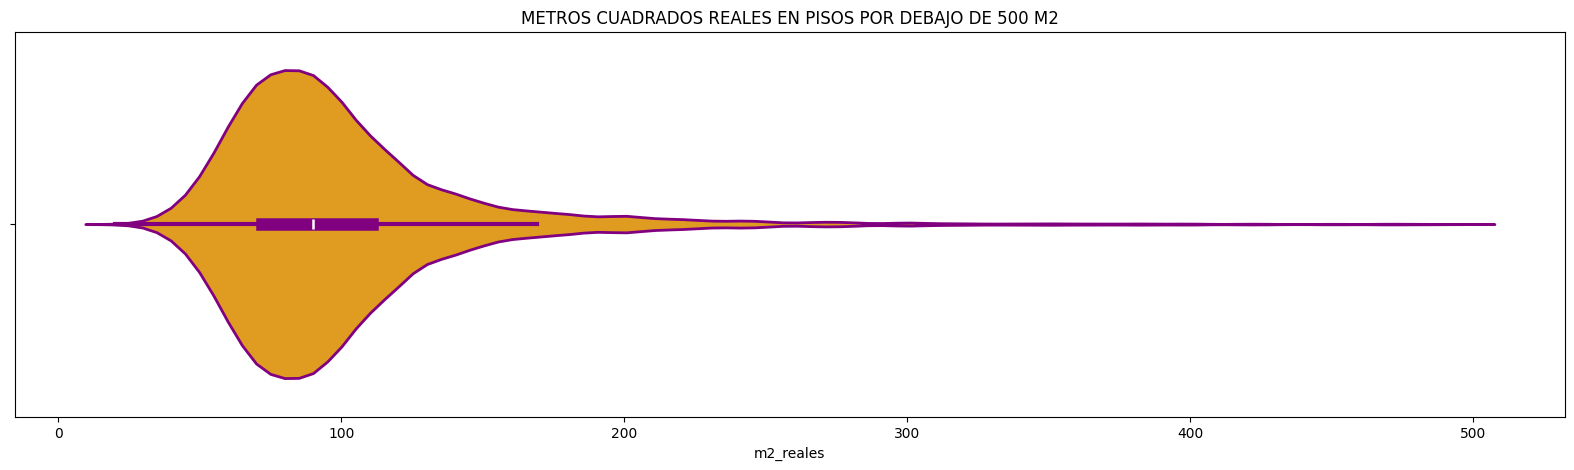

In [37]:
plt.figure(figsize=(20,5))
plt.title('METROS CUADRADOS REALES EN PISOS POR DEBAJO DE 500 M2')
sns.violinplot(data=viviendas['m2_reales'][(viviendas['tipo_vivienda'] == 'Piso') & (viviendas['m2_reales']<500)], color="orange", fill=True, linecolor='purple', linewidth=2, orient='h');

Vamos a dividir nuestro análisis entre tipo piso y tipo castillo. En el caso del tipo piso, nos encontramos también con un valor máximo de 166.043 metros cuadrados reales, con una mediana de 90 m2.

Analicemos lo que ocurre en el caso de las viviendas tipo castillo:

In [38]:
viviendas['m2_reales'][viviendas['tipo_vivienda'] == ' Castillo'].agg(['max','min','mean','median'])

max       780000.000
min          200.000
mean      107784.125
median      2488.000
Name: m2_reales, dtype: float64

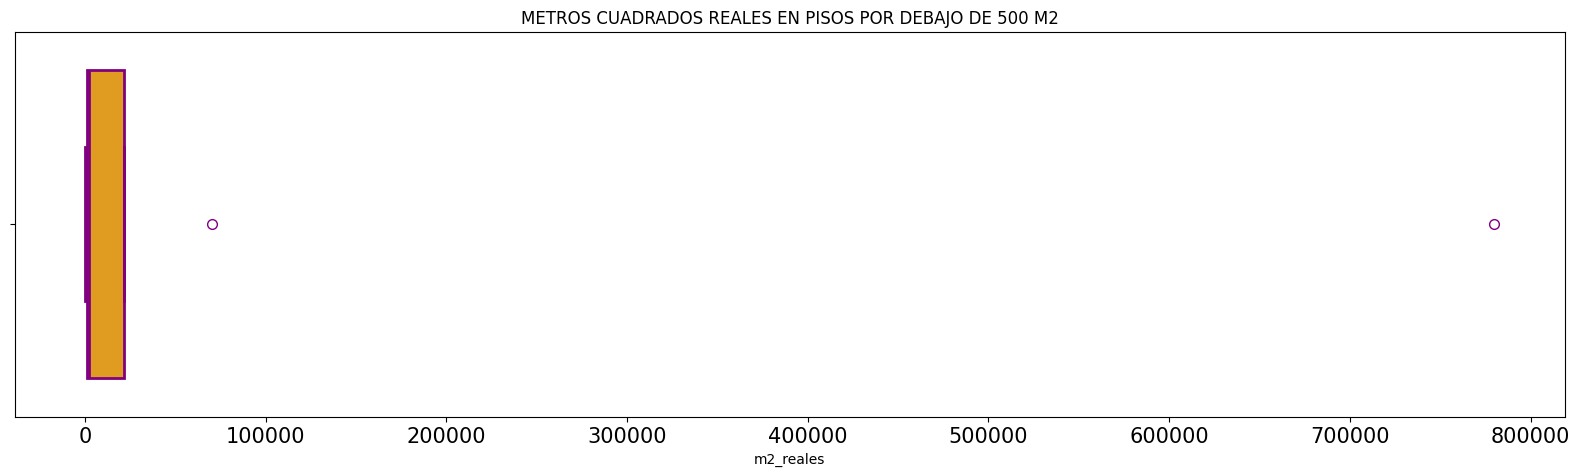

In [39]:
plt.figure(figsize=(20,5))
plt.title('METROS CUADRADOS REALES EN PISOS POR DEBAJO DE 500 M2')
sns.boxplot(data=viviendas['m2_reales'][viviendas['tipo_vivienda'] == ' Castillo'], color="orange", fill=True, linecolor='purple', linewidth=2, fliersize=7, orient='h')
plt.xticks(fontsize=15);

Una vez más, en el caso de los castillos, tenemos unos outliers que están alterando mucho nuestra visualización, llegando a un máximo de 780.000 metros cuadrados reales cuando la mediana se encuentra en 2.488 m2. Vamos a acotar un poco más nuestra visualización, eliminando de nuestro gráfico los valores por encima de 100.000 metros cuadrados reales:

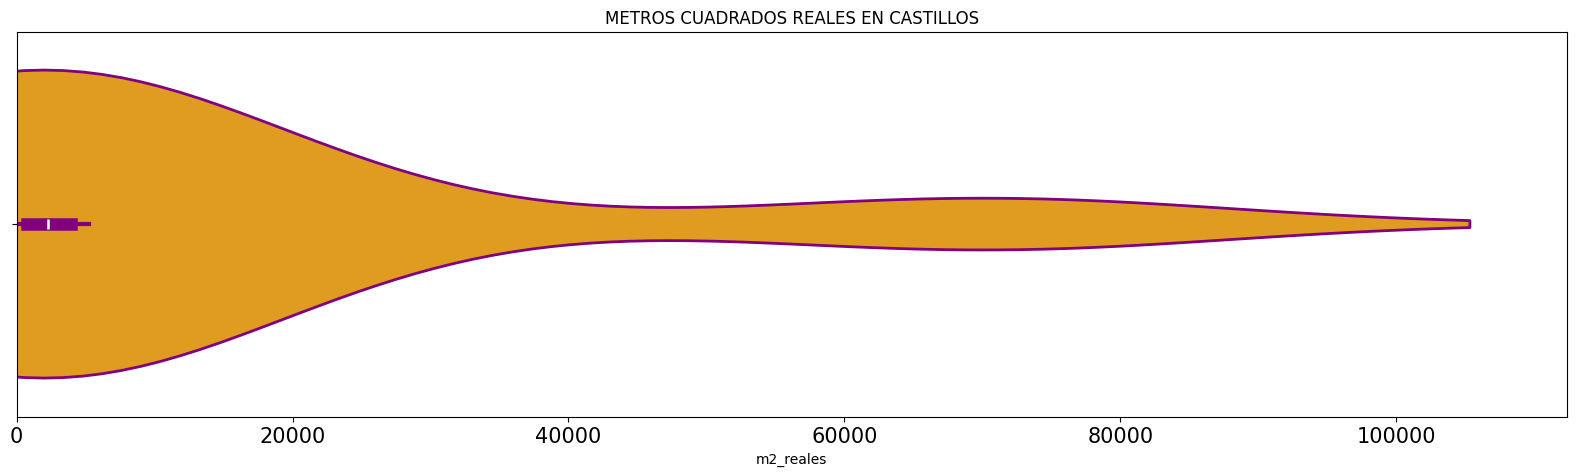

In [40]:
plt.figure(figsize=(20,5))
plt.title('METROS CUADRADOS REALES EN CASTILLOS')
sns.violinplot(data=viviendas['m2_reales'][(viviendas['tipo_vivienda'] == ' Castillo') & (viviendas['m2_reales'] < 100000)], color="orange", fill=True, linecolor='purple', linewidth=2, orient='h')
plt.xticks(fontsize=15)
plt.xlim(0);

Seguimos viendo que la mediana se encuentra en torno a los 2.500 metros cuadrados, pero hay varios casos de valores muy altos que impiden la visualización totalmente correcta de la función de densidad

Analizaremos ahora la correlación entre metros cuadrados reales y precio. Al ser dos variables con unidades tan diferentes, tendremos que normalizar las escalas. En este caso, usaremos el método de escalado min max. Este método convierte las variables a valores entre 0 y 1. Para hacer la visualización más representativa, hemos acotado los dos ejes a 0,4:

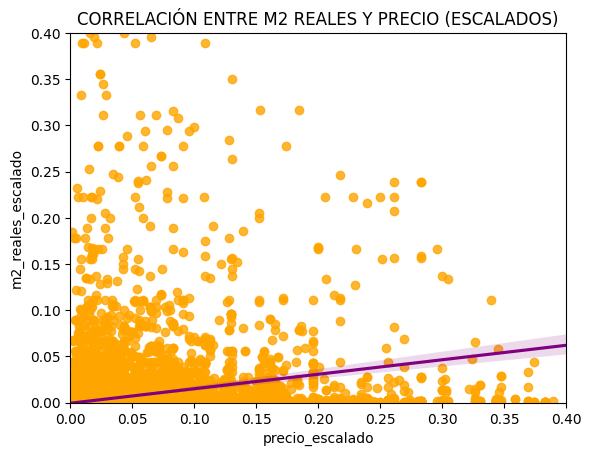

In [50]:
scaler = MinMaxScaler()

viviendas['precio_escalado'] = scaler.fit_transform(viviendas[['precio']])
viviendas['m2_reales_escalado'] = scaler.fit_transform(viviendas[['m2_reales']])

sns.regplot(x='precio_escalado', y='m2_reales_escalado', data=viviendas, color='orange', marker='o', line_kws=dict(color='purple'))
plt.xlim(0,0.4)
plt.ylim(0,0.4)
plt.title('CORRELACIÓN ENTRE M2 REALES Y PRECIO (ESCALADOS)');

Como podemos comprobar, la relación lineal entre metros cuadrados reales y precio no es muy robusta. Esto nos lleva a considerar cuáles podrían ser las variables que más puedan explicar el precio:

In [42]:
correlaciones = viviendas[['m2_reales','m2_utiles','num_banios','num_habitaciones','precio']]

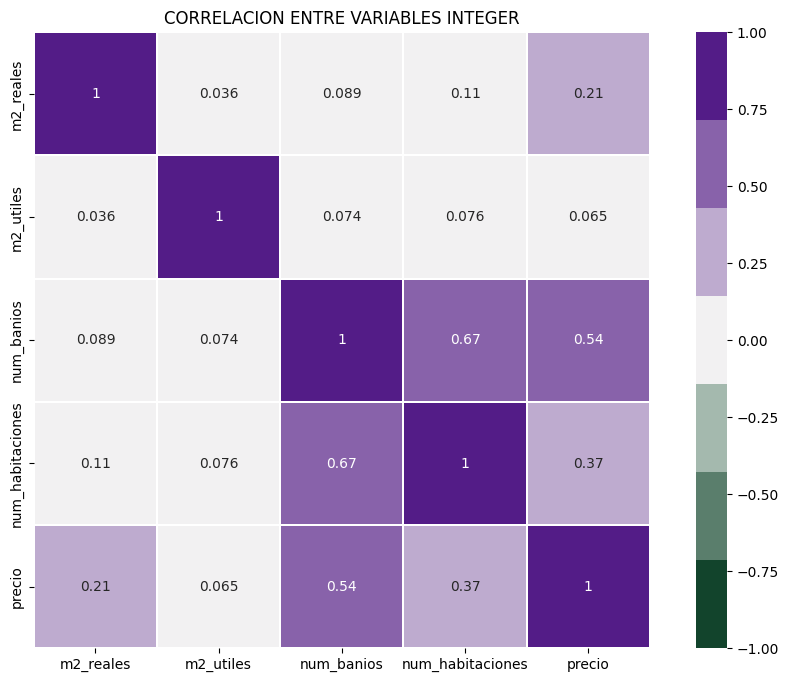

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(correlaciones.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True)
plt.title('CORRELACION ENTRE VARIABLES INTEGER');

Como vemos en el heatmap, las variables que más explican el precio son número de baños y número de habitaciones. Sin embargo, metros cuadrados reales y metros cuadrados útiles no tienen una gran correlación con el precio. Esto quiere decir que en nuestro dataset estas dos variables podrían explicar parte de la variabilidad de los precios, pero no son variables robustas a la hora de predecir el precio de una vivienda.

### VAIRABLES STRING

Vamos a analizar la cantidad de viviendas en base a su estado de conservación:

In [44]:
viviendas['condicion'].value_counts()

condicion
segunda mano/buen estado      72272
indefinido                    14124
segunda mano/para reformar    11045
promoción de obra nueva        2559
Name: count, dtype: int64

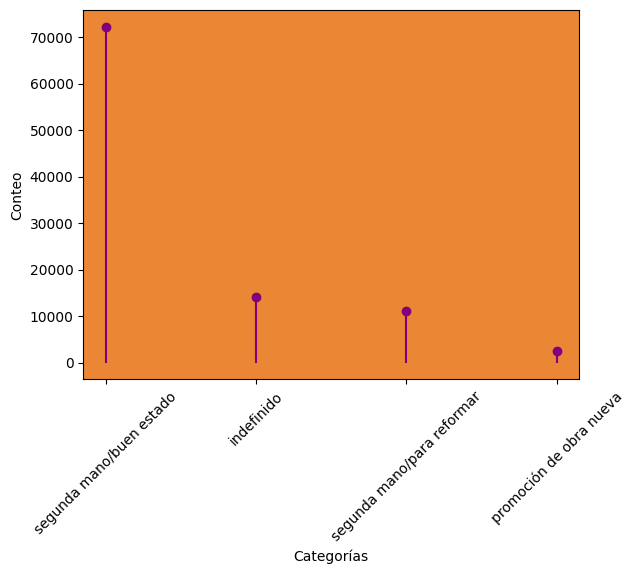

In [45]:
conteo_condicion = viviendas['condicion'].value_counts().reset_index()
conteo_condicion.columns = ['condicion','conteo']
fig, ax = plt.subplots()
ax.stem(conteo_condicion['condicion'], conteo_condicion['conteo'], linefmt='purple', markerfmt='o', basefmt=' ')
ax.set_xlabel('Categorías')
ax.set_ylabel('Conteo')
ax.set_facecolor('#eb8634')
plt.xticks(rotation=45)
plt.show()

La gran mayoría de propiedades en venta corresponden a viviendas de segunda mano en buen estado. En el polo opuesto, las viviendas de promoción de obra nueva consisten un bajo porcentaje del total.

Ahora analizaremos la variable que contiene la descripción de las viviendas con la intención de ver qué palabras se repiten más que otras:

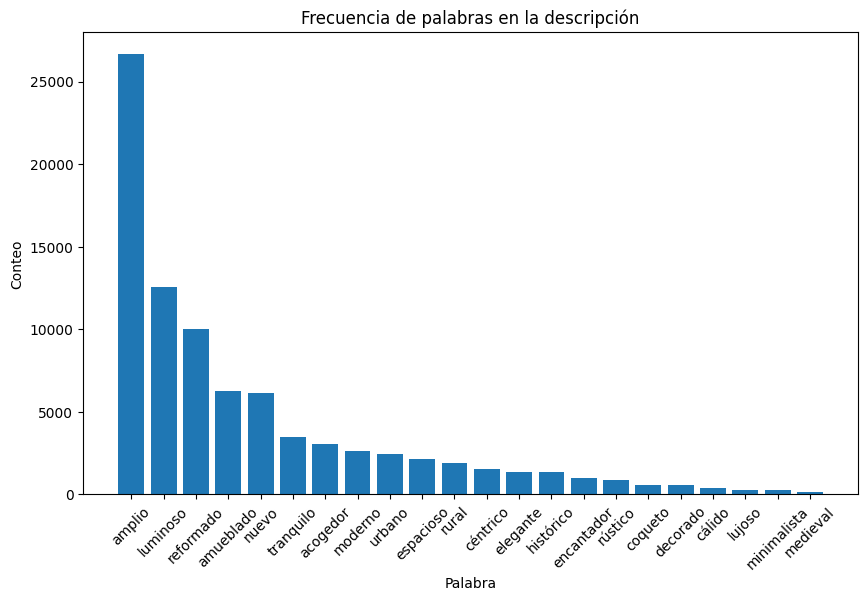

In [47]:
data = viviendas['descripcion']

palabras_a_contar = ['espacioso', 'acogedor', 'luminoso','reformado','nuevo','amueblado','amplio', 'céntrico', 'moderno','encantador','coqueto','elegante','lujoso','tranquilo','cálido','minimalista','decorado','rústico','histórico','rural','urbano','medieval']

conteo_palabras = {palabra: 0 for palabra in palabras_a_contar}

for palabra in palabras_a_contar:
    conteo_palabras[palabra] = data.str.count(palabra).sum()

conteo_df = pd.DataFrame(list(conteo_palabras.items()), columns=['Palabra','Conteo'])

conteo_df = conteo_df.sort_values(by='Conteo', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(conteo_df['Palabra'], conteo_df['Conteo'])
plt.xlabel('Palabra')
plt.ylabel('Conteo')
plt.title('Frecuencia de palabras en la descripción')
plt.xticks(rotation=45)
plt.show()

Aquí podemos ver el conteo de las veces que aparecen las palabras en nuestra lista en las descripciones de las viviendas

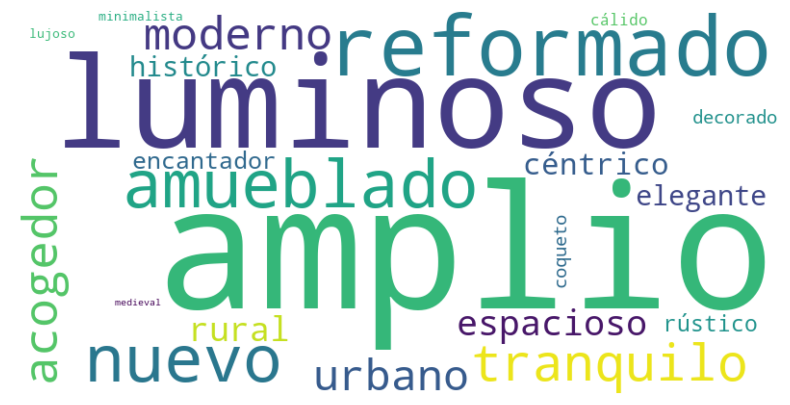

In [48]:
word_counts_dict = dict(zip(conteo_df['Palabra'], conteo_df['Conteo']))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Y aquí podemos verlas en modo de word map. En este caso, las palabras que aparecen más grandes aparecen en más ocasiones.